In [3]:
!pip install nwis

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nwis import Nwis

In [6]:
site_id = '13185000' # Roaring Fork River at Glenwood Springs (CO)

my_start = '2015-10-01'
my_end = '2020-09-30'

In [8]:
# Get data from NWIS
nwis_data = Nwis()
dataset = nwis_data.get_data(site=site_id, start_date = my_start, end_date = my_end, data_type = 'dv')


In [10]:
dataset

<xarray.Dataset>
Dimensions:   (datetime: 1827)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2015-10-01 2015-10-02 ... 2020-09-30
Data variables:
    00060     (datetime) float64 301.0 314.0 313.0 318.0 ... 377.0 372.0 364.0
Attributes:
    site_name:         BOISE RIVER NR TWIN SPRINGS ID
    site_code:         13185000
    site_latitude:     43.66805556
    site_longitude:    -115.7252778
    site_altitude:     3340
    site_coord_datum:  NAD83

In [12]:
dataset['00060']

<xarray.DataArray '00060' (datetime: 1827)>
array([301., 314., 313., ..., 377., 372., 364.])
Coordinates:
  * datetime  (datetime) datetime64[ns] 2015-10-01 2015-10-02 ... 2020-09-30
Attributes:
    variable_name:       discharge
    variable_unit:       cubic feet per second
    variable_data_type:  instantaneous value

In [14]:
Q = dataset['00060'].values
dates = dataset['datetime'].values
Q.shape

(1827,)

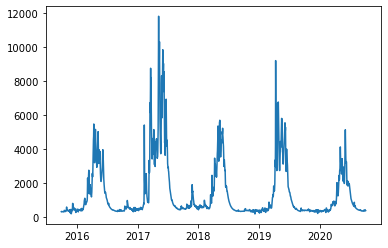

In [16]:
plt.plot(dates,Q)
plt.show()

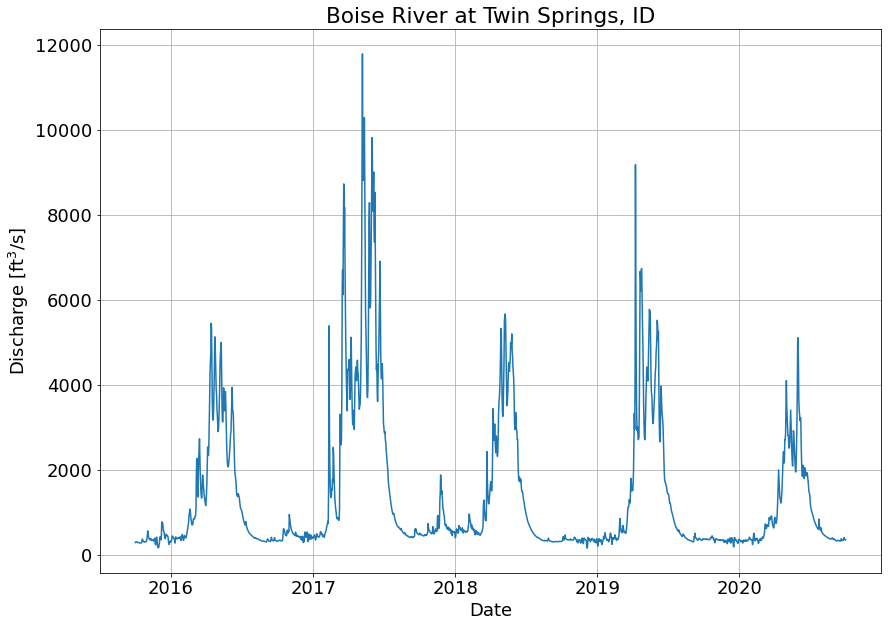

In [25]:
plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18})
plt.plot(dates,Q)
plt.grid()

plt.title ('Boise River at Twin Springs, ID')
plt.xlabel('Date')
plt.ylabel('Discharge [ft${}^3$/s]')
plt.savefig('Hydrograph_BRTS.png', dpi = 300)


In [26]:
Q.mean()

1374.104542966612

In [27]:
Q.std()

1672.0725496827163

In [33]:
WY = dataset['datetime.year'].values
dates_new = pd.DatetimeIndex(dates)

dates_new.month
WY[dates_new.month >= 10] +=1
WY

array([2016, 2016, 2016, ..., 2020, 2020, 2020])

In [38]:
df = pd.DataFrame()
df['Dates'] = dates_new
df['WaterYear'] = WY
df['Discharge'] = Q

df

,Dates,WaterYear,Discharge
0,2015-10-01,2016,301.0
1,2015-10-02,2016,314.0
2,2015-10-03,2016,313.0
3,2015-10-04,2016,318.0
4,2015-10-05,2016,313.0
...,...,...,...
1822,2020-09-26,2020,407.0
1823,2020-09-27,2020,417.0
1824,2020-09-28,2020,377.0
1825,2020-09-29,2020,372.0


In [39]:
df.to_pickle('my_streamflow_data.pkl')